In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1435,2020-08-27,United Kingdom,328915.0,328846.0,41489.0,41465.0,69.0,24.0
1436,2020-08-27,Germany,237586.0,237936.0,9290.0,9285.0,-350.0,5.0
1437,2020-08-27,Iran,365398.0,363363.0,21019.0,20901.0,2035.0,118.0
1438,2020-08-27,Turkey,262402.0,262507.0,6179.0,6183.0,-105.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7268.440277777778
RMSE =  28987.097560763516


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  297.46458333333334
RMSE =  729.7903480338263


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  50164.313868613135
RMSE =  90866.65750897859
-- World performances for deaths --
MAE =  1642.3503649635036
RMSE =  2016.2405972466186


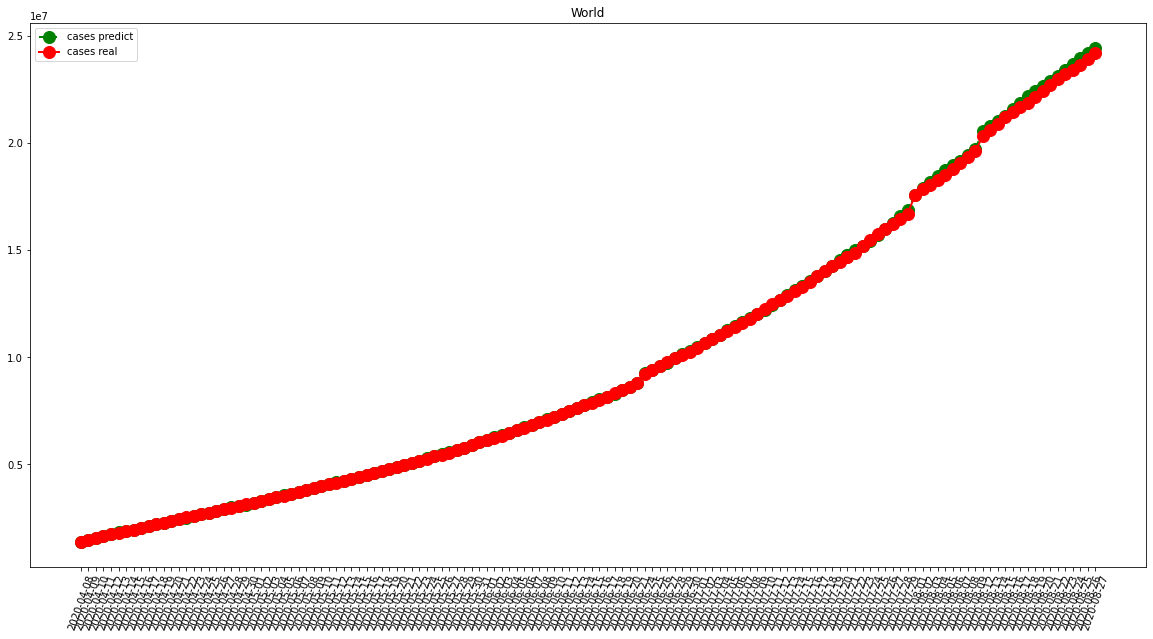

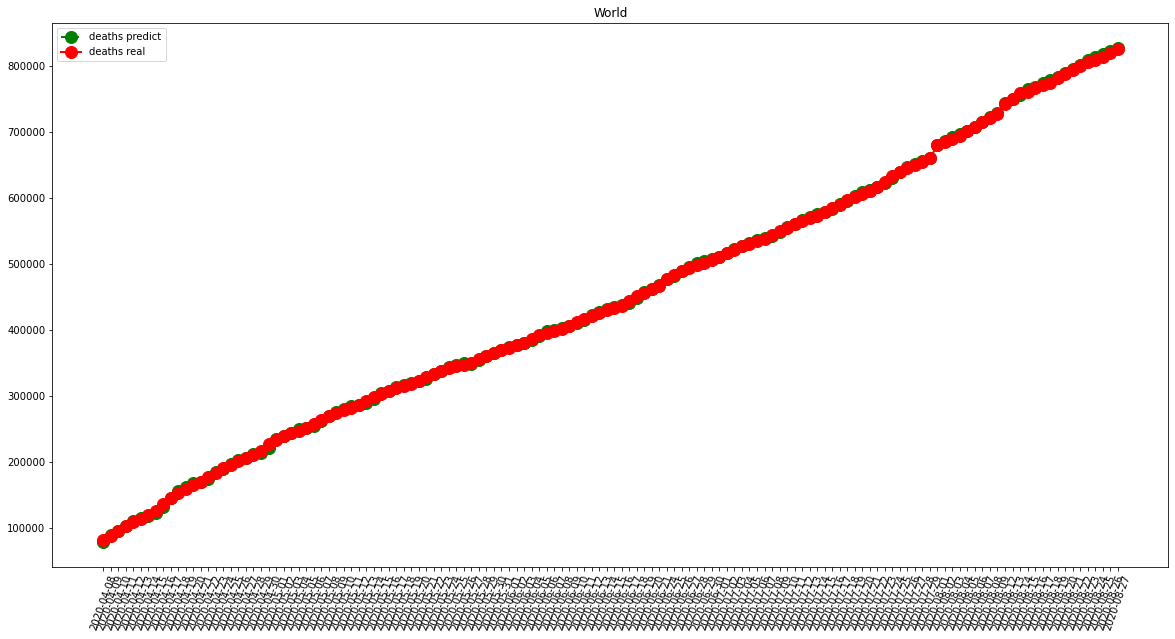

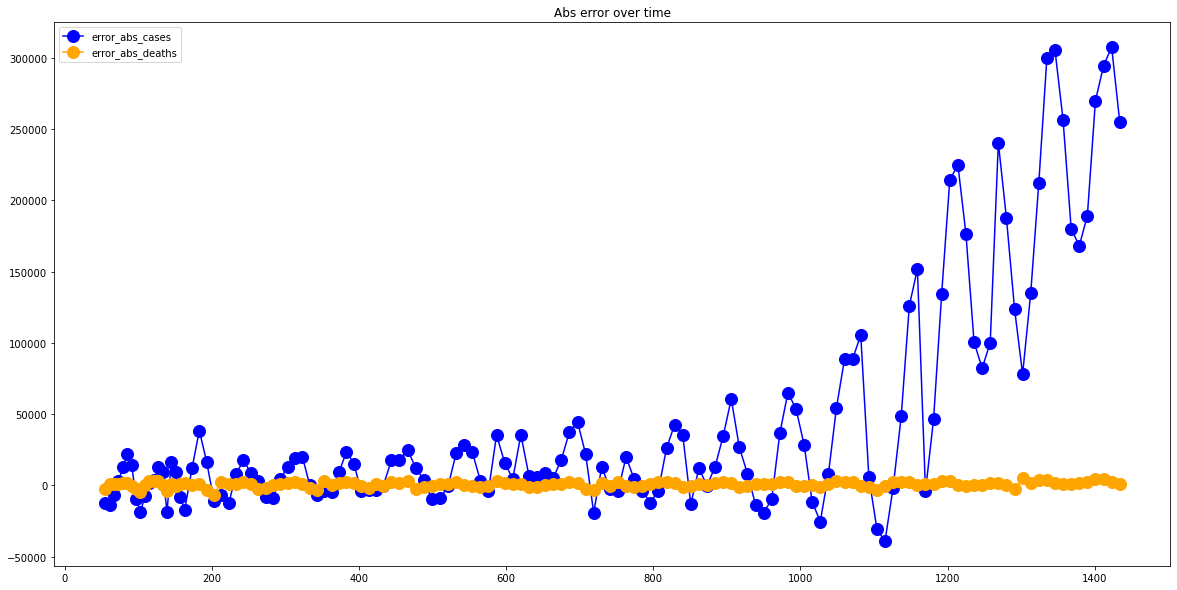

In [7]:
visShow("World")

-- France performances for cases --
MAE =  939.2585034013606
RMSE =  1423.8391930337666
-- France performances for deaths --
MAE =  126.41496598639456
RMSE =  276.61079265322405


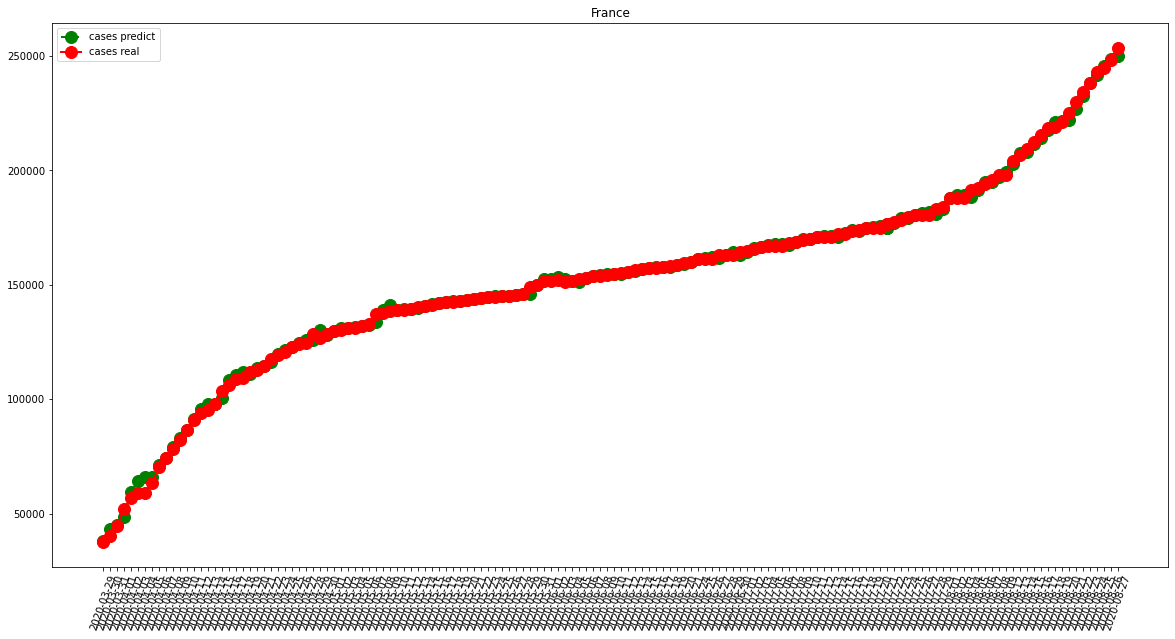

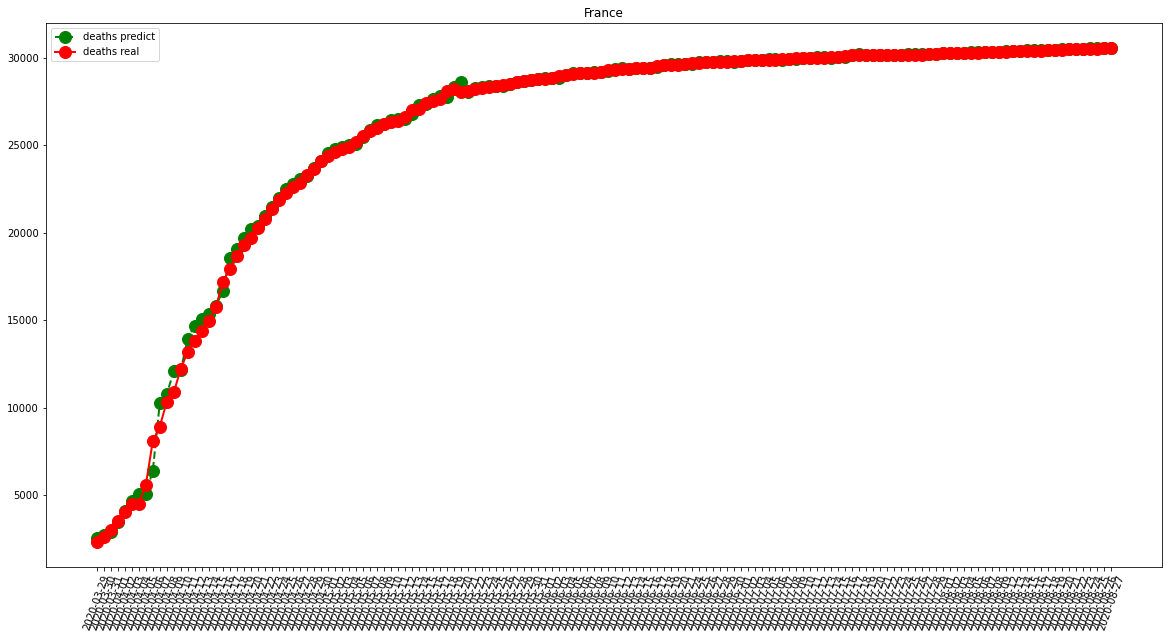

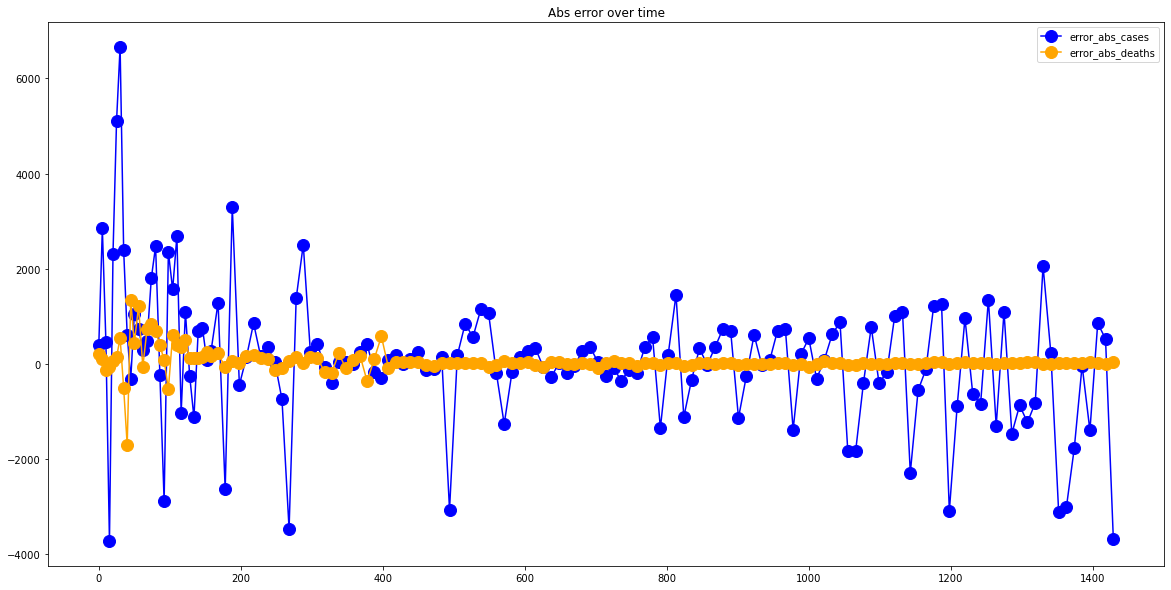

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.91156462585036
RMSE =  459.2597119203875
-- Italy performances for deaths --
MAE =  75.0204081632653
RMSE =  244.8024887606361


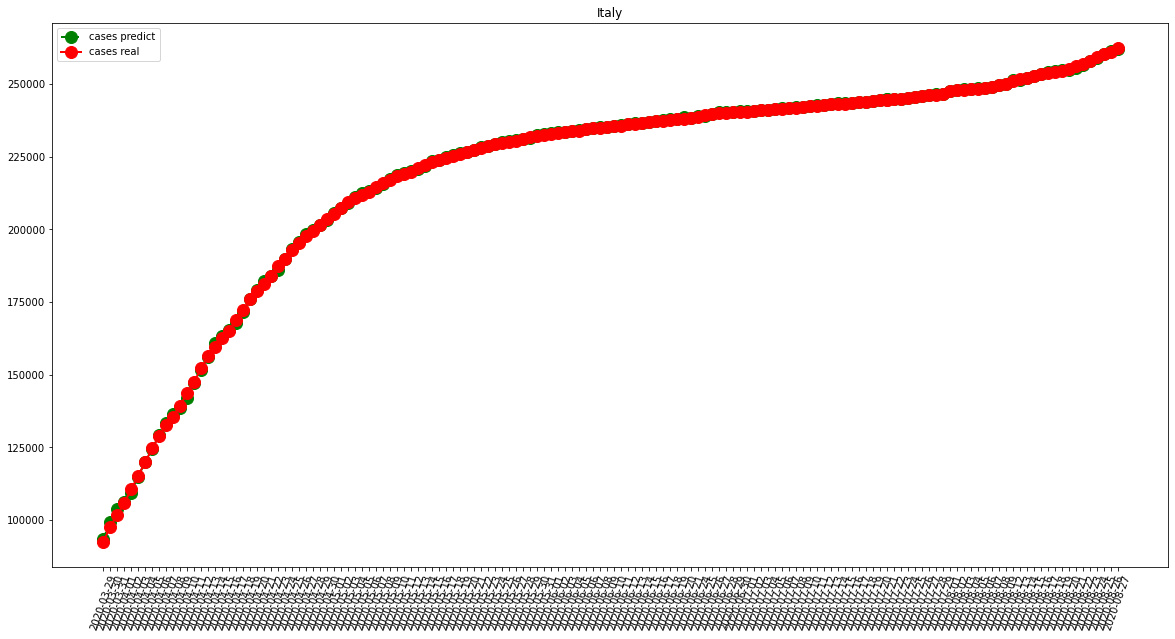

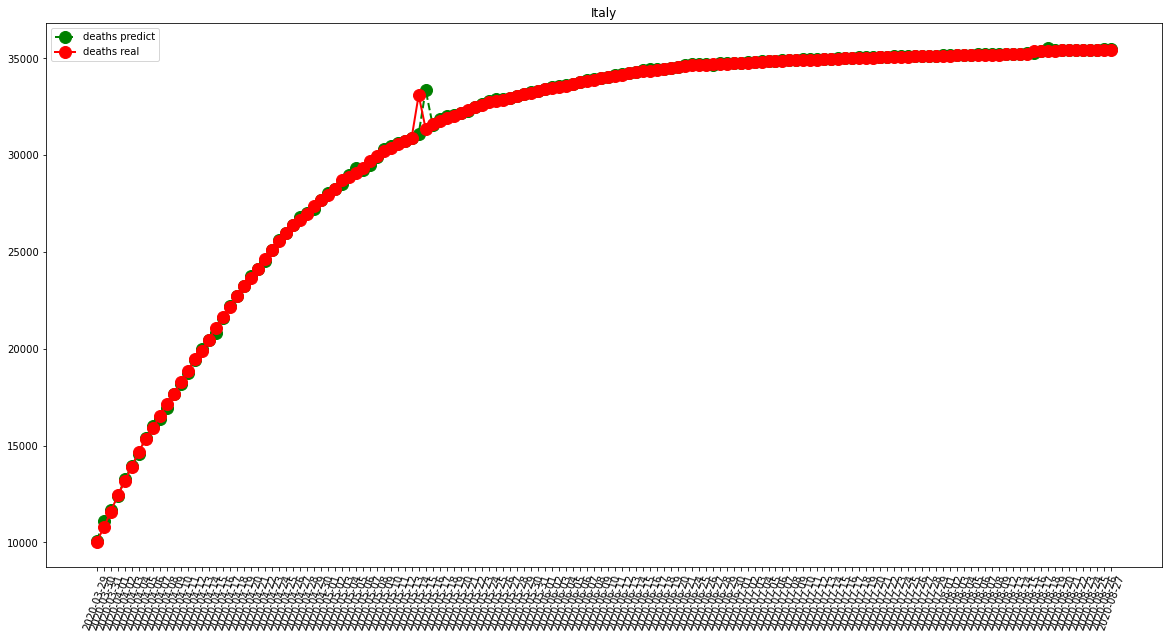

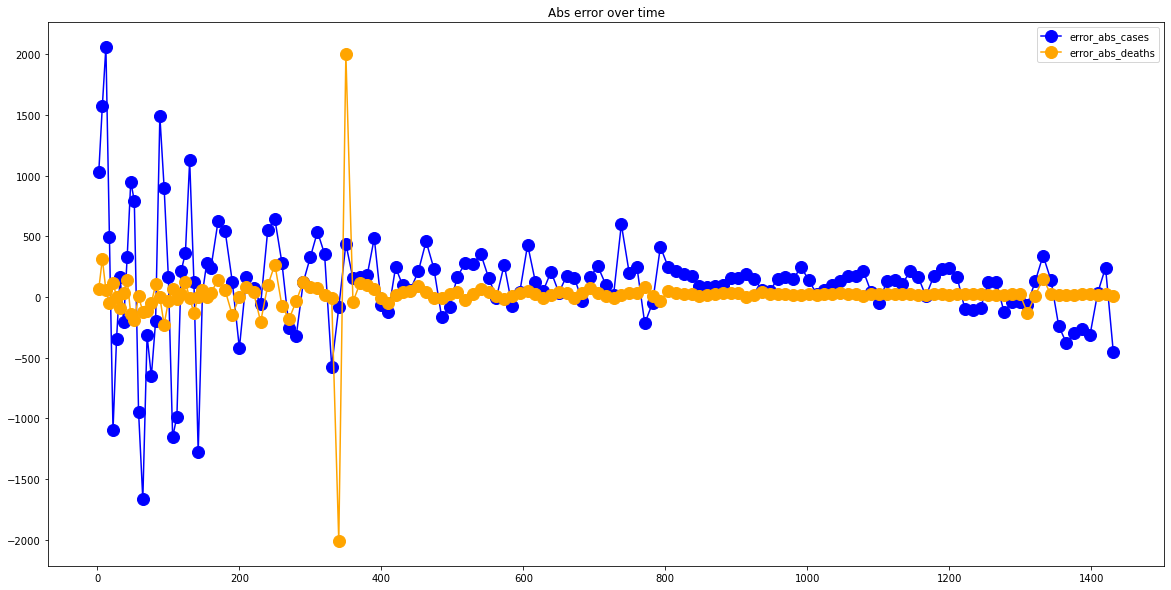

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1711.9931972789116
RMSE =  3311.4520182825772
-- Spain performances for deaths --
MAE =  129.4421768707483
RMSE =  335.08216070356343


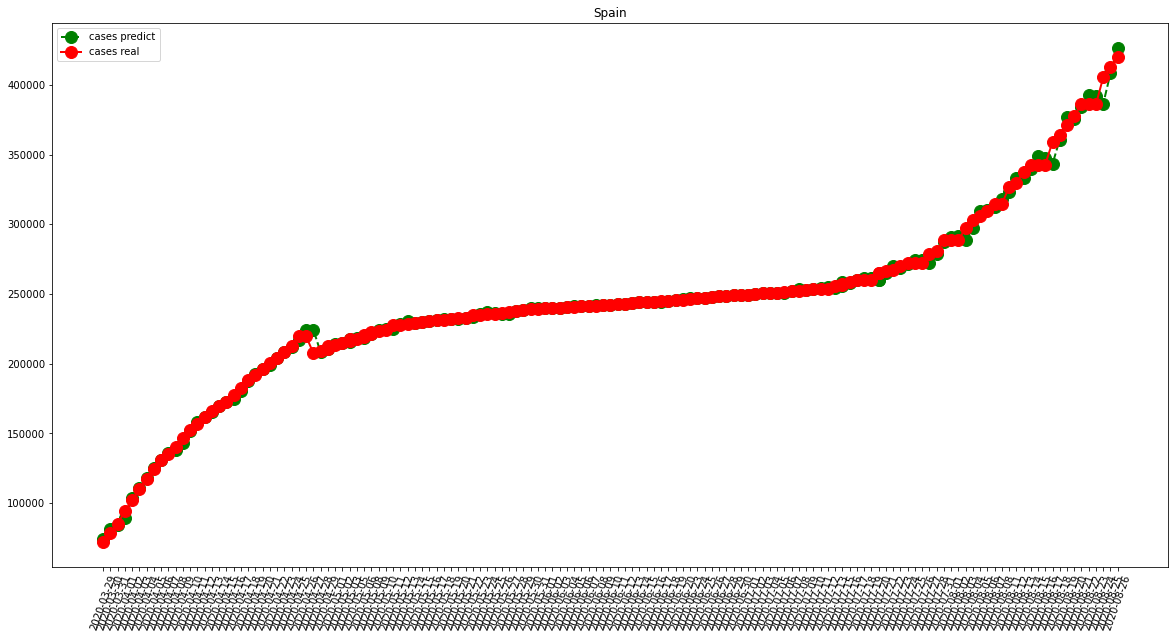

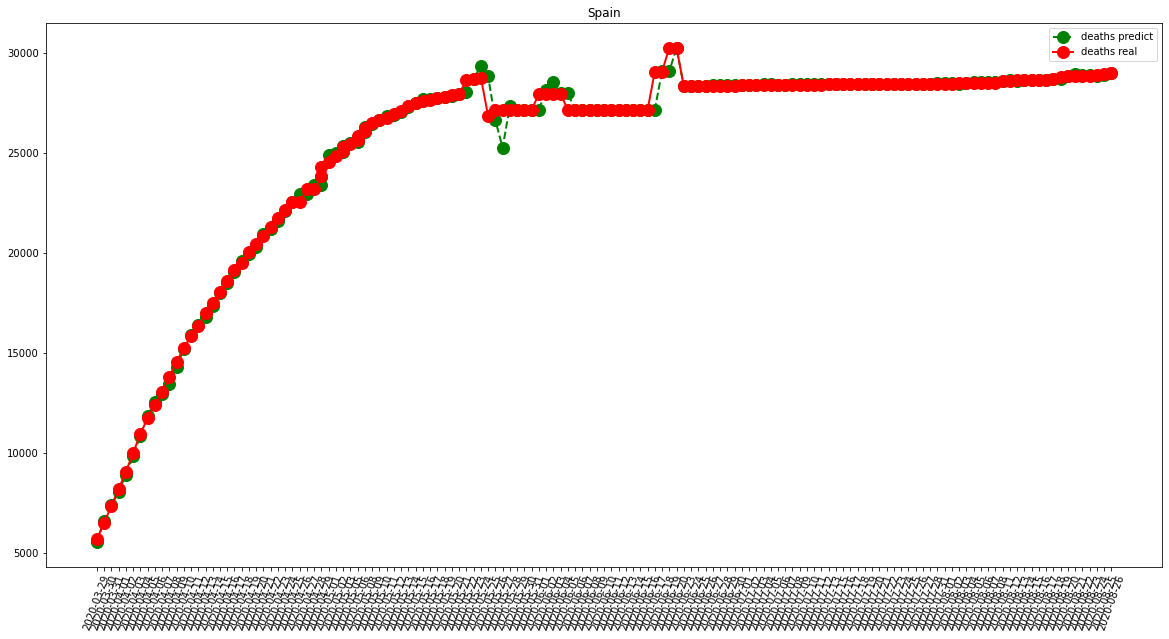

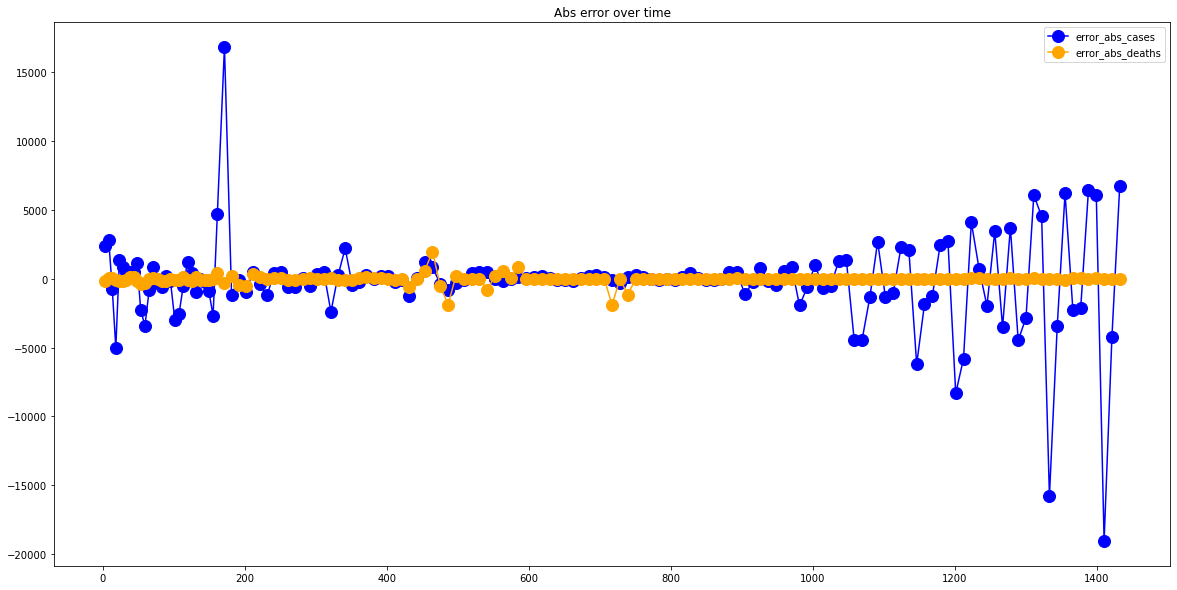

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  11042.986394557824
RMSE =  17489.04413614187
-- United States performances for deaths --
MAE =  493.00680272108843
RMSE =  698.1916973571824


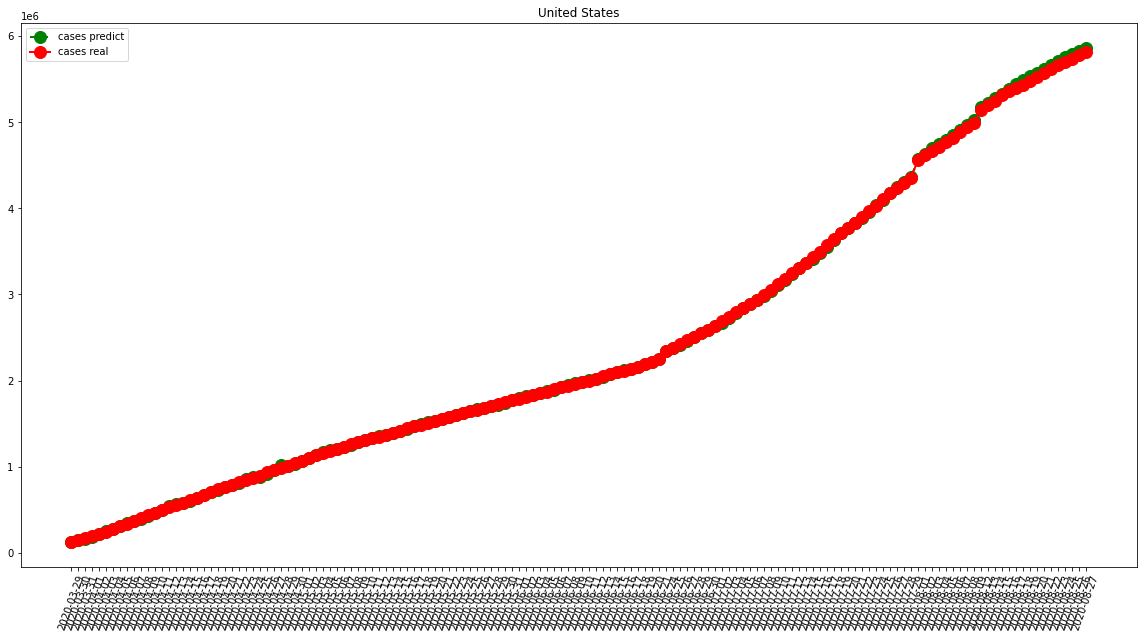

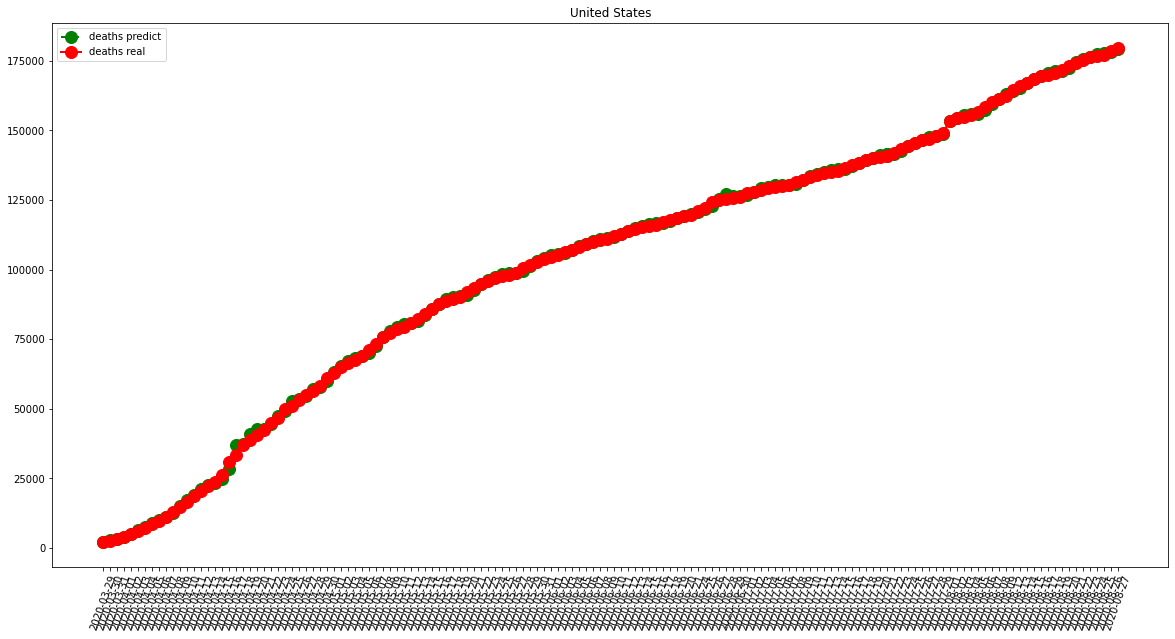

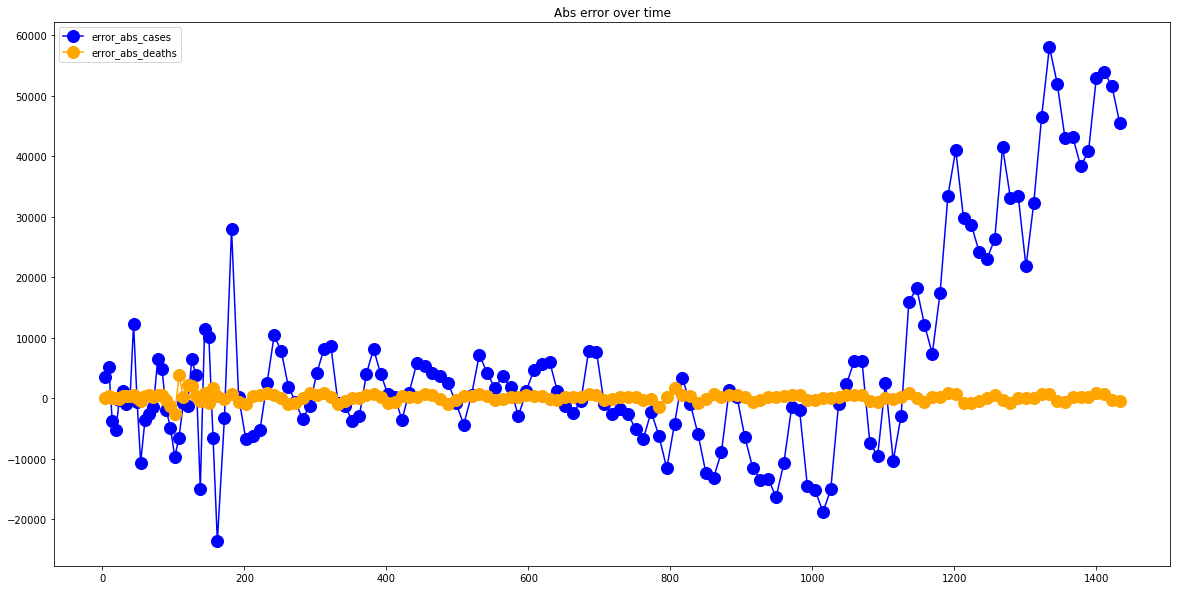

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  67.77551020408163
RMSE =  98.398226022392
-- China performances for deaths --
MAE =  28.210884353741495
RMSE =  129.50688790024043


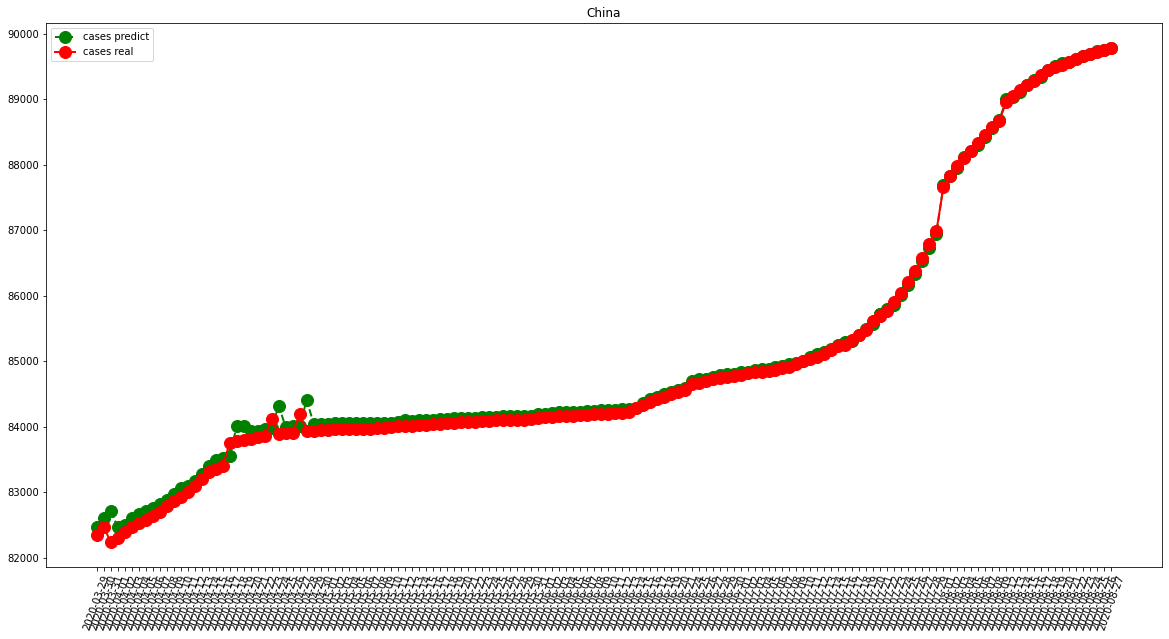

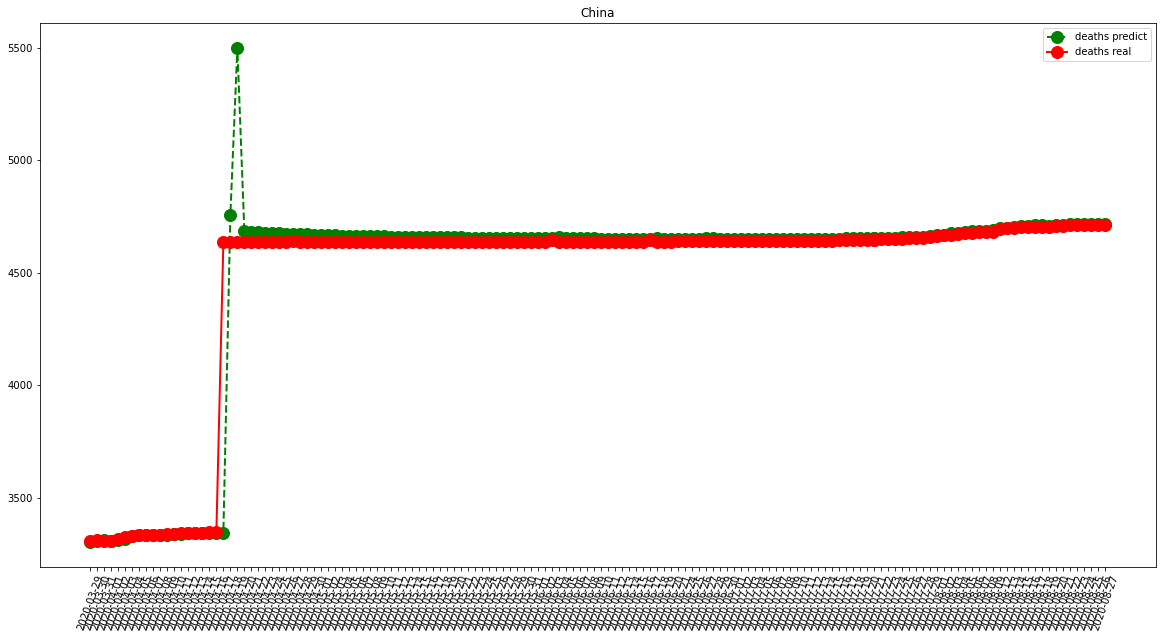

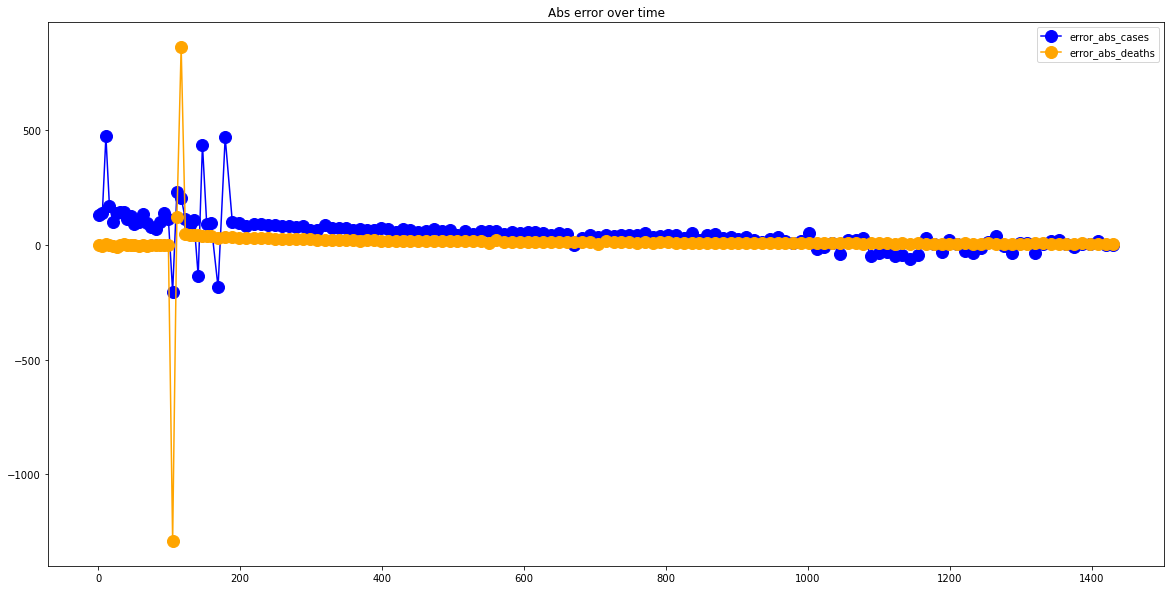

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1092.90756302521
RMSE =  3832.5743021515714
-- United Kingdom performances for deaths --
MAE =  252.46218487394958
RMSE =  782.2793618650564


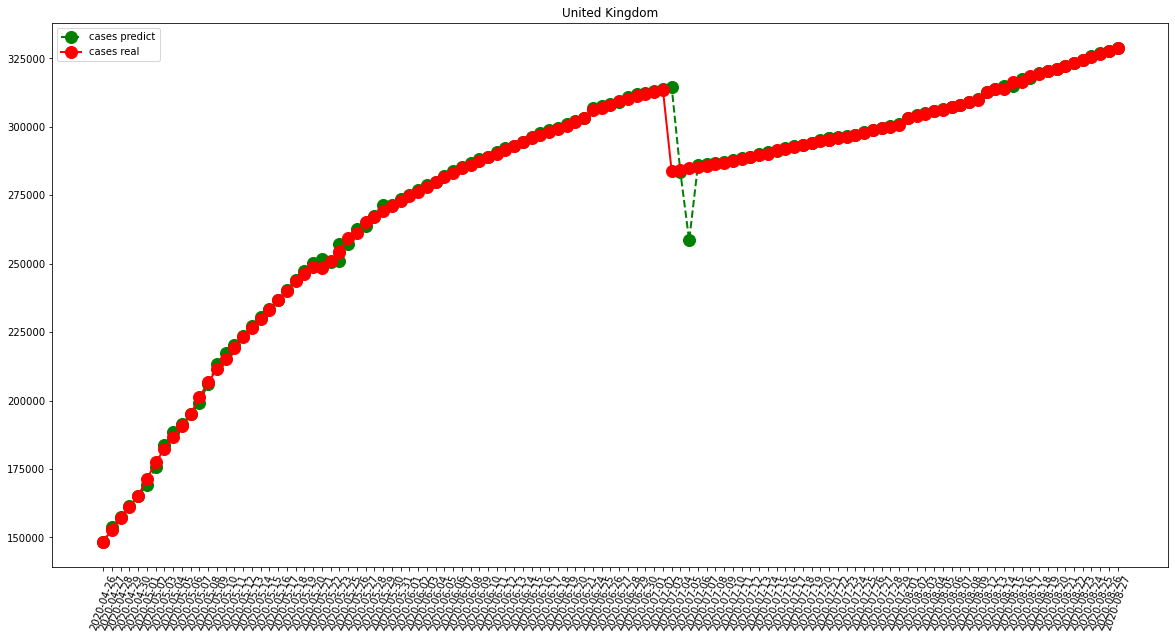

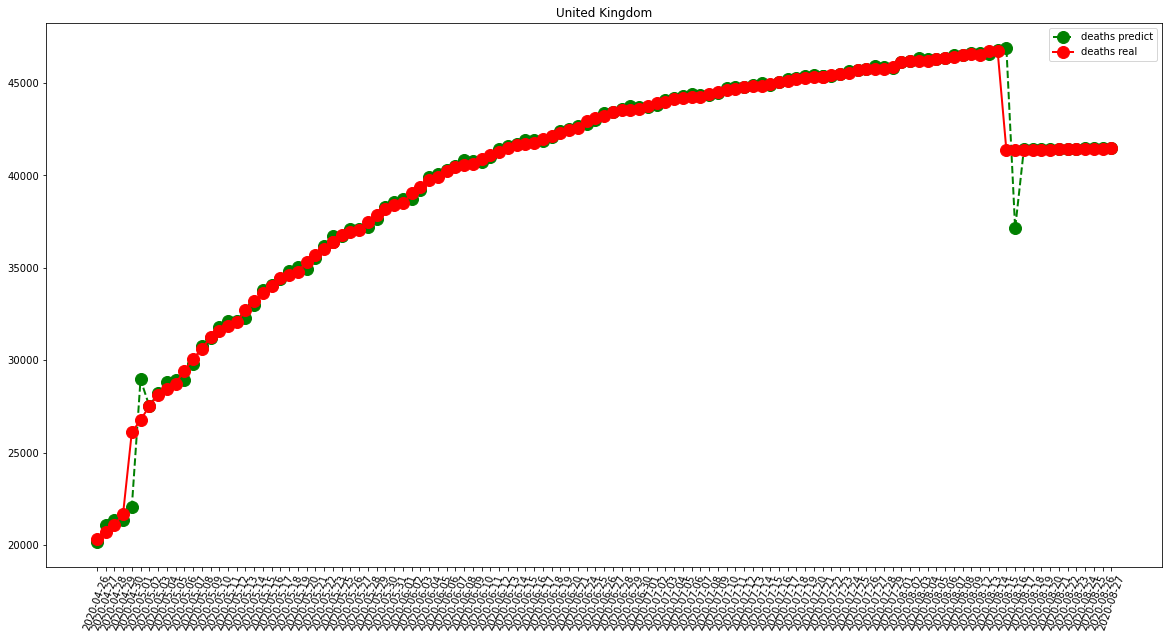

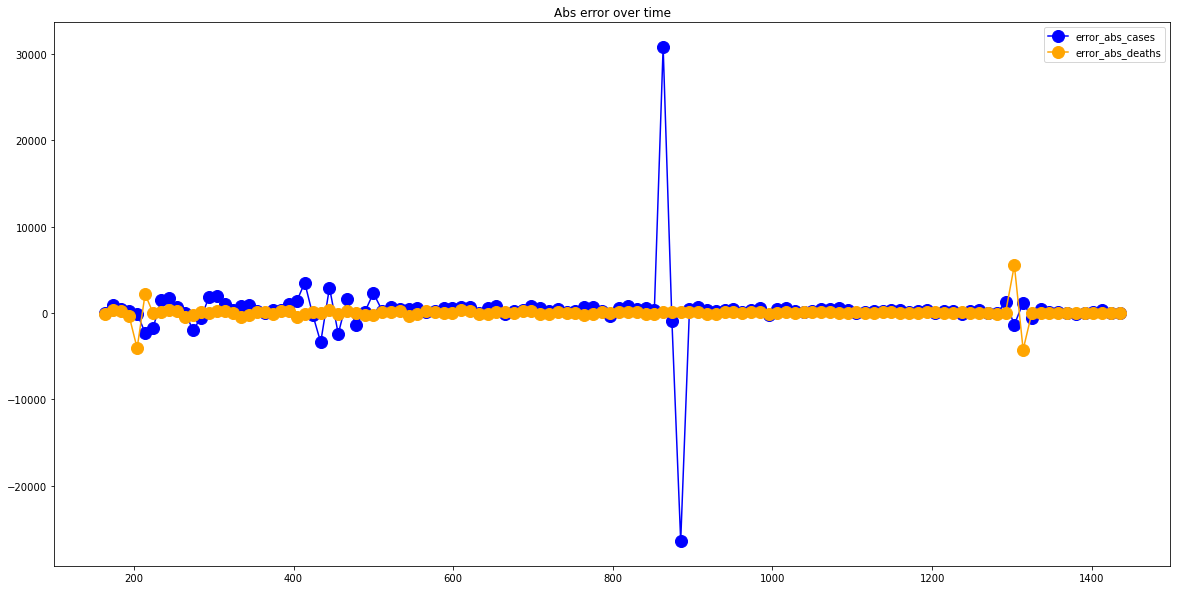

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  399.12605042016804
RMSE =  588.0588920373551
-- Germany performances for deaths --
MAE =  21.680672268907564
RMSE =  40.26613148215029


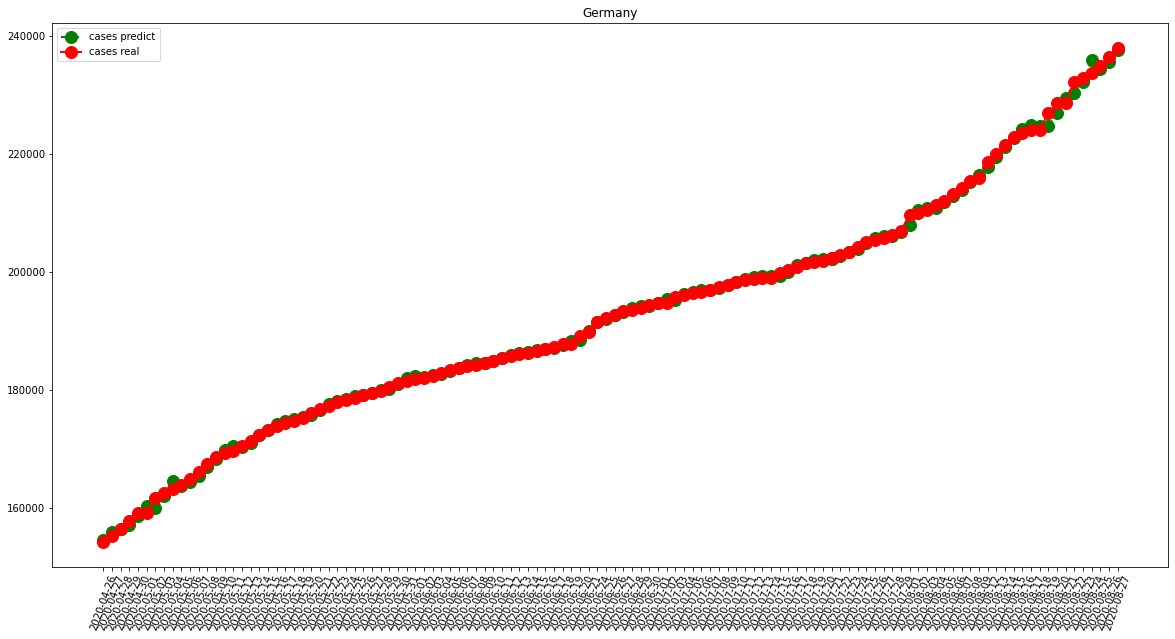

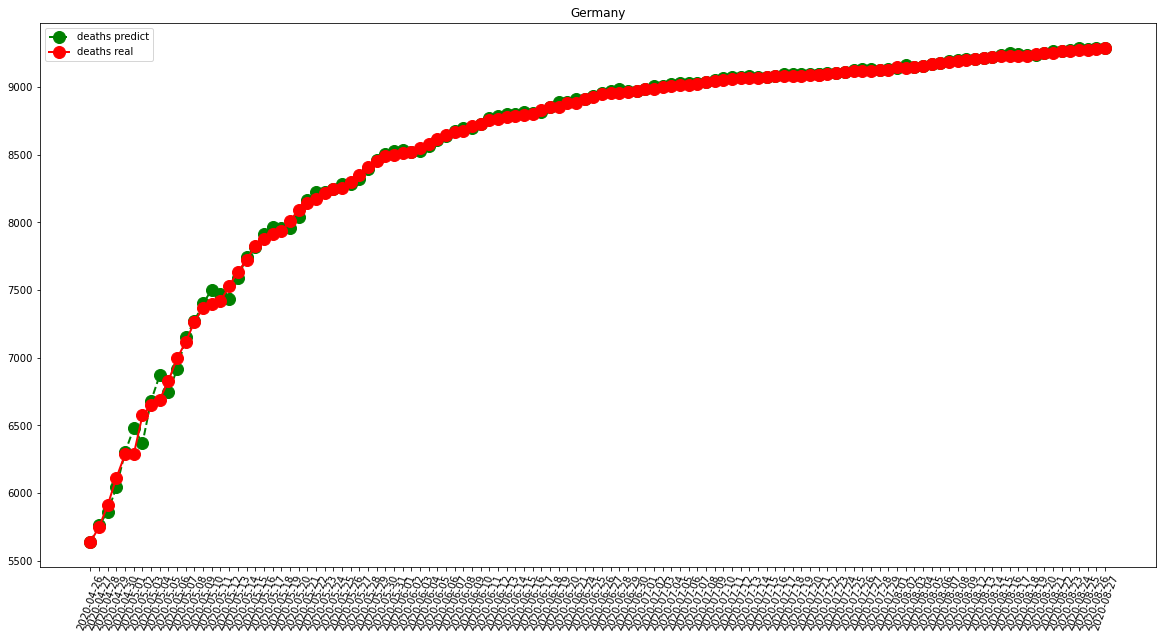

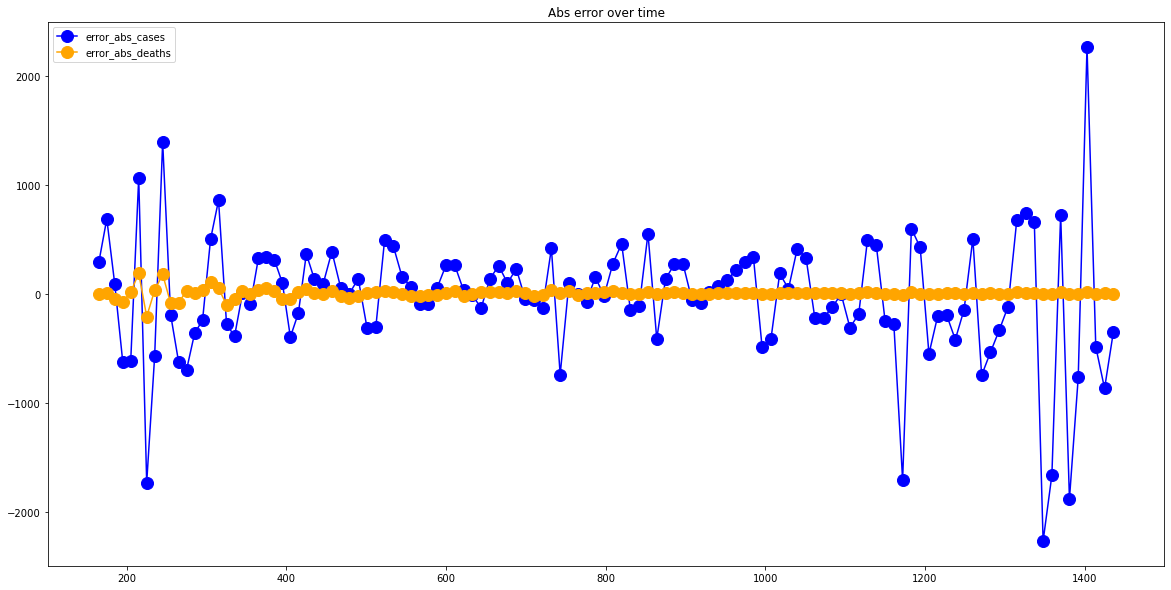

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  758.781512605042
RMSE =  1130.2155851462867
-- Iran performances for deaths --
MAE =  41.89915966386555
RMSE =  80.06153095898053


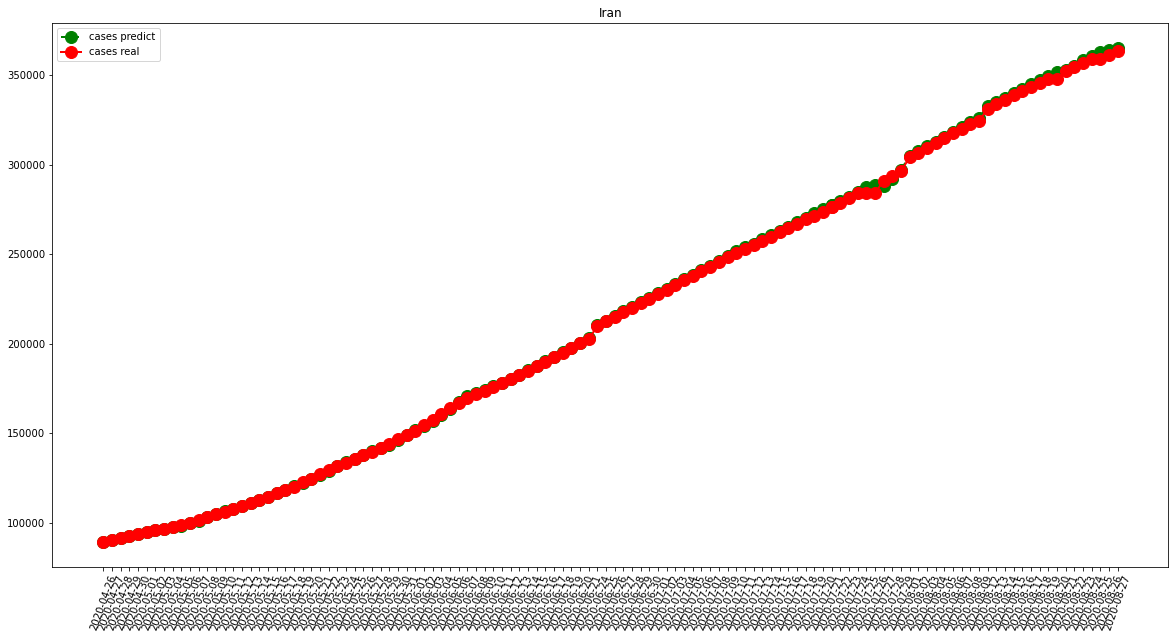

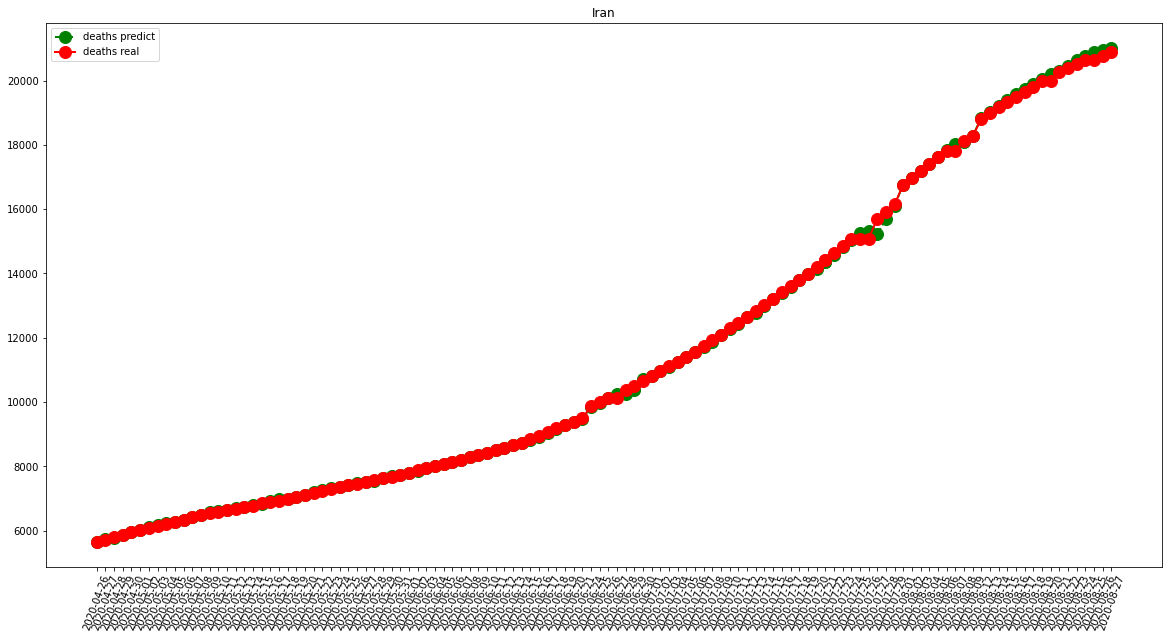

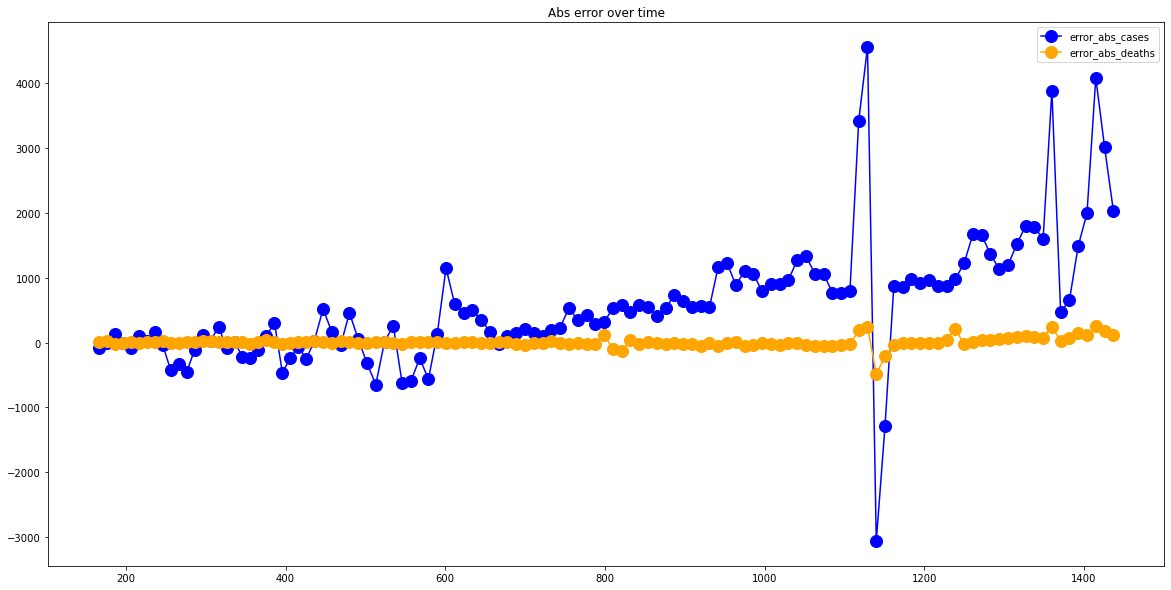

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.23529411764707
RMSE =  327.09313041760225
-- Turkey performances for deaths --
MAE =  16.445378151260503
RMSE =  93.06693172933448


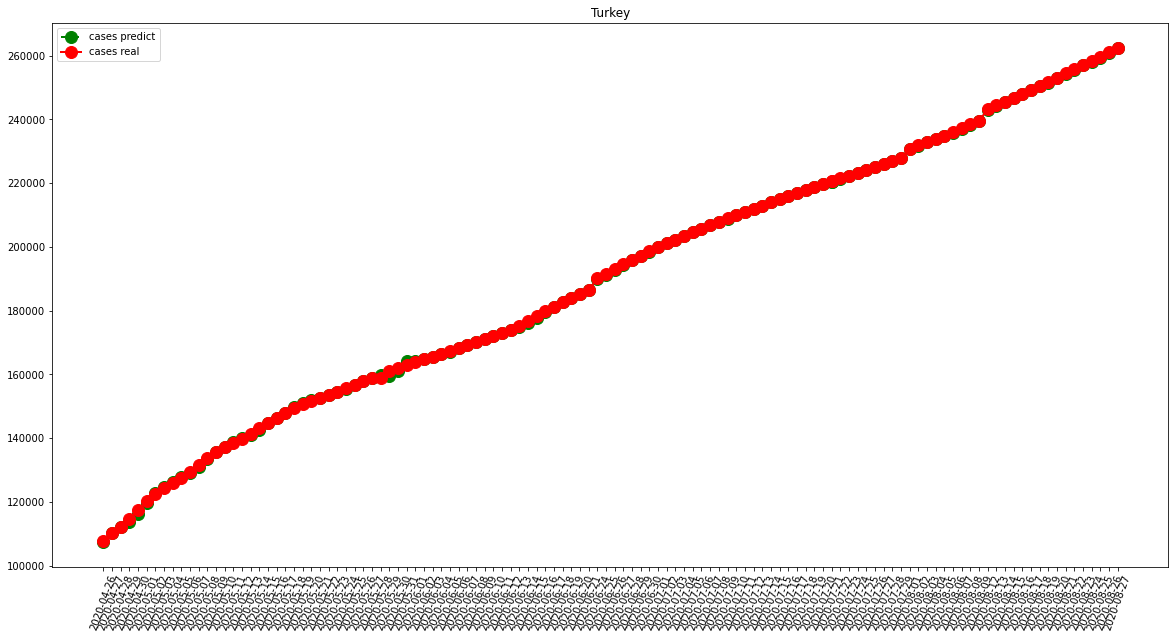

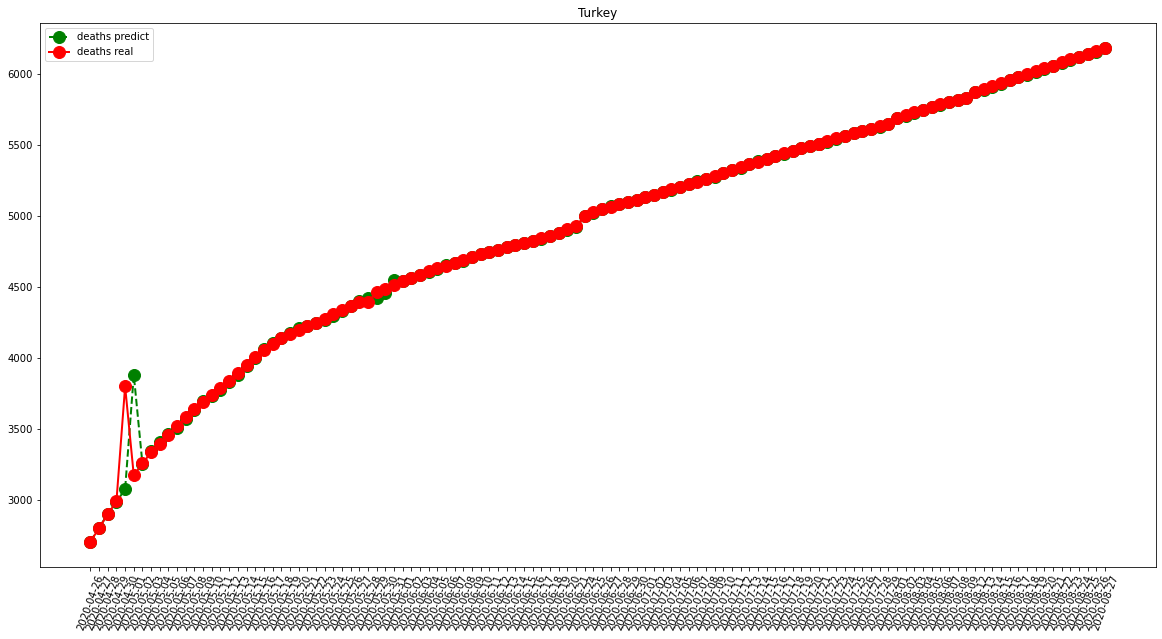

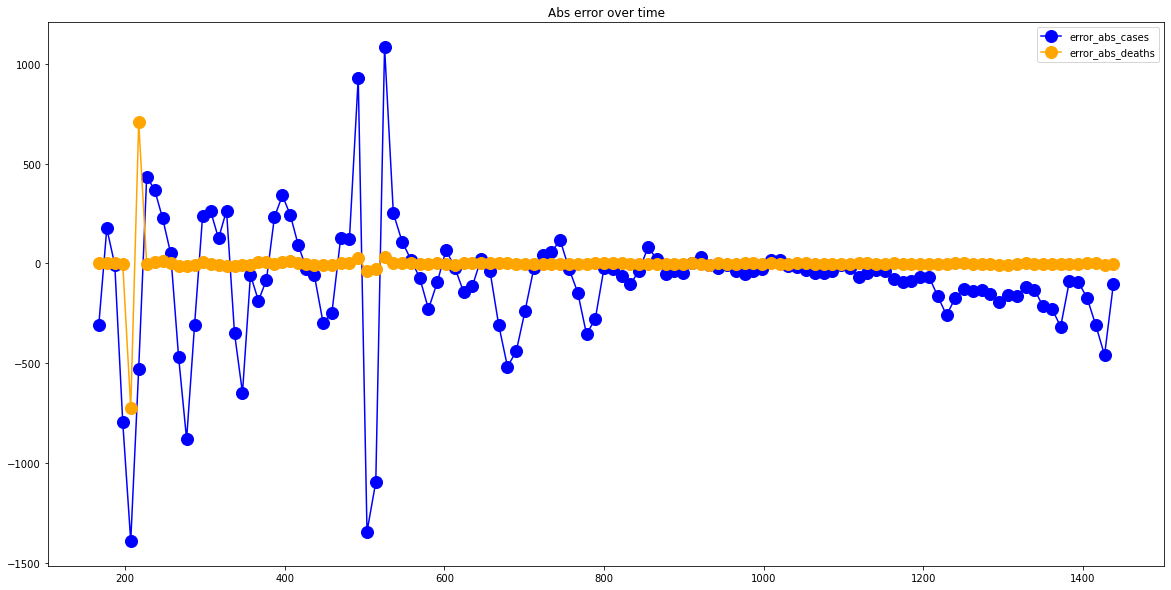

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13424.58695652174
RMSE =  18036.590433844776
-- Brazil performances for deaths --
MAE =  418.7282608695652
RMSE =  516.0846640182041


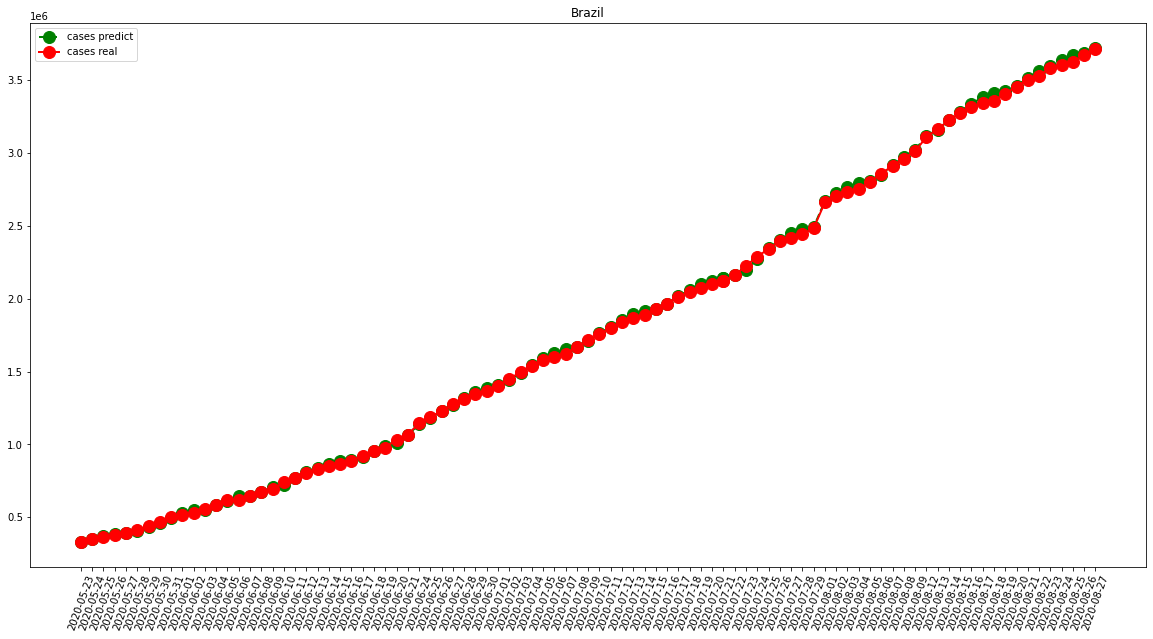

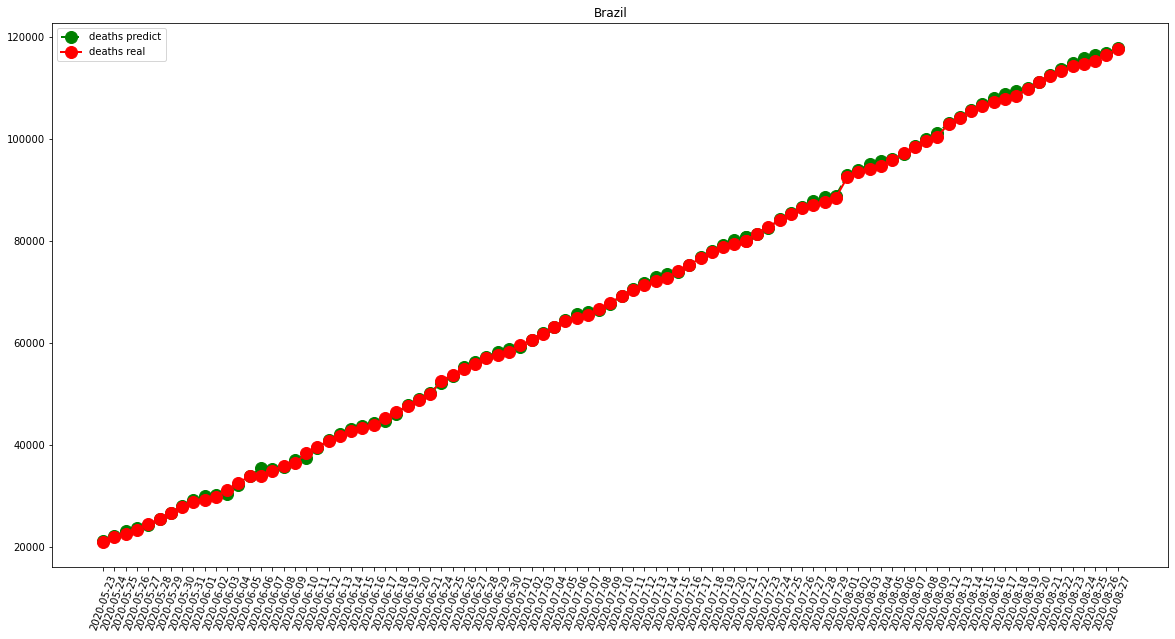

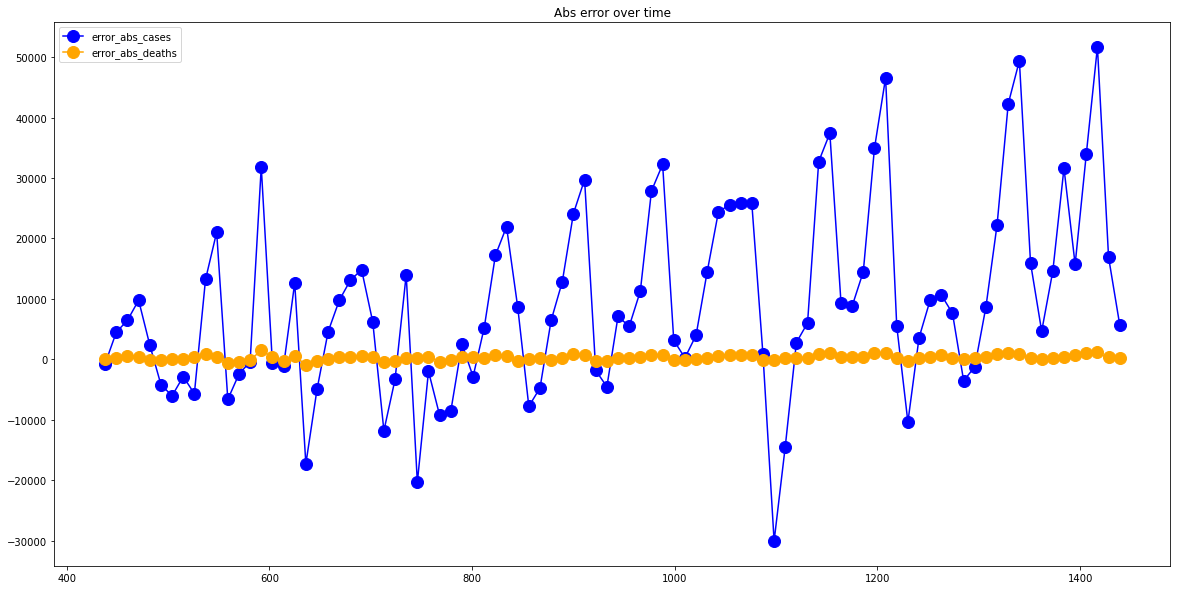

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)